In [1]:
# 보스톤 주택 가격(연속값) 예측(회귀모델)
# 데이터 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로딩
boston_df=pd.read_csv('./boston_house_prices.csv', header=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


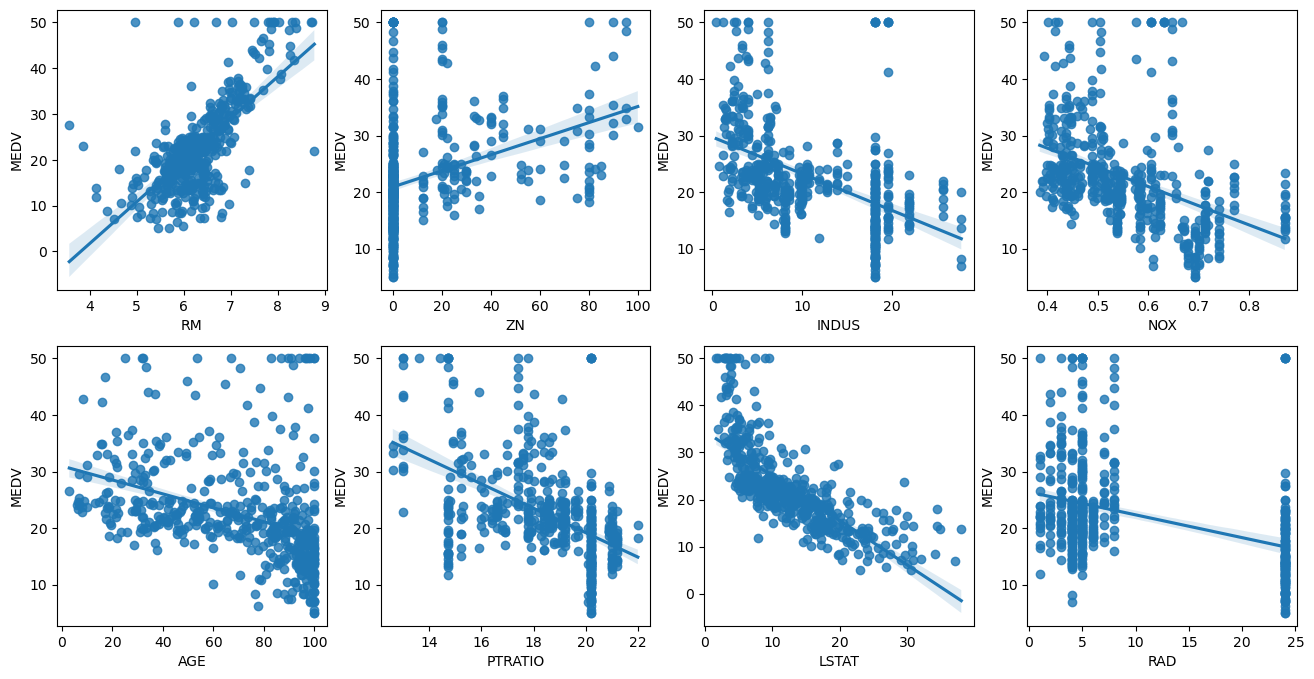

In [3]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='MEDV',data=boston_df , ax=axs[row][col])

# 이미지 파일 저장
fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터/레이블 분리
y_target=boston_df['MEDV'] # 레이블 추출
X_data=boston_df.drop(['MEDV'], axis=1, inplace=False) # False :  삭제한 DF 반환


In [5]:
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test=\
    train_test_split(
        X_data,
        y_target,
        test_size=0.3,
        random_state=156
    )

In [6]:
# LinearRegression object create
lr=LinearRegression()
lr.fit(X_train, y_train) # 학습
y_pred=lr.predict(X_test) # 테스트데이터로 예측값 추출
# 오차 (원래답-예측값) : MSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse) # 제곱근

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance score : {r2_score(y_test,y_pred):.3f}')
# Variance score : 0.757 => 모델의 설명력으로 75% 정도 설명할 수 있는 모델이다

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [7]:
# 피처의 영향력 : 피처별 계수 값을 출력
print(f'회귀 계수값 : {np.round(lr.coef_,1)}')

회귀 계수값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [8]:
coeff=pd.Series(
    data=np.round(lr.coef_,1)
    , index=X_data.columns
)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [9]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [10]:
y_target.shape[0]

506

In [11]:
# 회귀식 만들것인데 상수항 추가
import statsmodels.api as sm

X=sm.add_constant(X_data)

# OLS(회귀 모델)
model=sm.OLS(y_target, X)

# 학습
results=model.fit()

# 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          6.72e-135
Time:                        18:03:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

- R-squared: 0.741
  - 설명력 : 이 모델이 주택가격에 대해 74.1% 설명할 수 있는 모델
  - 25.9% 정도는 설명을 못한다 - 추가 변수 고려, 비선형성 고려

- Adj. R-squared:0.734
  - 피처 개수를 보정한 설명력
  - 너무 많은 피처로 과적합되었었는지를 보완
- F-statistic: 108.1
  - Prob (F-statistic):          6.72e-135(p-value)
  - p-value < 0.05 : 회귀모델 유의미함 의미


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
-> 모든 독립변수의 값이 0일 때 주택 가격은 36459$ 수준

CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
-> 범죄율 1 증가 -> 가격 1080 하락, p-value : 0.001 < 0.05 -> 해석이 의미가 있음 

ZN             0.0464      0.014      3.382      0.001       0.019       0.073
-> 대형 주거지역 비율 1% 증가 -> $460 증가, 유의미하다

INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
-> 비상업지구 유의미하지 않다
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
-> 찰스강 근처이면 평균 $2686 증가, 유의미미
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
-> 대기오염 0.1 증가 -> $17766 하락
RM             3.8099      0.418      9.116      0.000       2.989       4.631
-> 방 1개 증가 -> $3800 증가 , 유의미하다
-> [2.989 ~ 4.631] : 방 1개 추가시 가격 상승폭은 $2989~$4631 사이가 될 것이다 95% 신뢰수준에서 
말할 수 있다 의미
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
-> 오래된 집, 의미가 없다
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425

In [12]:
# 다중 공선성 : 피처 간 상관관계가 너무 클 때 발생, 계수의 불안정과 해석의 어려움 발생
# 모델 성능 저하
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame() # 빈 데이터프레임 생성
vif['feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,idx) for idx in range(X.shape[1])]
vif

,feature,VIF
0,const,585.265238
1,CRIM,1.792192
2,ZN,2.298758
3,INDUS,3.991596
4,CHAS,1.073995
5,NOX,4.393720
6,RM,1.933744
7,AGE,3.100826
8,DIS,3.955945
9,RAD,7.484496


In [13]:
# vif value : 1~5 정상
# vif value : 5~10 약한 다중 공선성 가지고 있다. 주의 필요하다
# vif value : 10이상 심한 다중 공선성, 해당 피처를 제거 필요


In [14]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 예제 데이터 생성 [2X2]
X=np.arange(4)
print(X)
X=X.reshape(2,2) # 2차원 행렬 변환
print(X)

# 다항식 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print(poly_ftr)


[0 1 2 3]
[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [15]:
# 보스톤 주택 데이터 -> 다항식으로 변환후 처리
# X_data : 전체 데이터
# X_data.info() : 13 feature
poly=PolynomialFeatures(degree=2)
poly.fit(X_data)
poly_ftr=poly.transform(X_data) # 13 feature -> 105 feature
# poly_ftr.shape
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test=\
    train_test_split(
        poly_ftr, # 다항식으로 변환한 전체 데이터 506개
        y_target, # 전체 레이블
        test_size=0.3,
        random_state=156
    )



In [16]:
# 보스톤 주택 데이터 -> 다항식으로 변환후 처리
# X_data : 전체 데이터
# X_data.info() : 13 feature
degree=3
poly=PolynomialFeatures(degree=degree)
poly.fit(X_data)
poly_ftr=poly.transform(X_data) # 13 feature -> 105 feature
print(f'피처의 개수 : {poly_ftr.shape[1]}')
# poly_ftr.shape
# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test=\
    train_test_split(
        poly_ftr, # 다항식으로 변환한 전체 데이터 506개
        y_target, # 전체 레이블
        test_size=0.3,
        random_state=156
    )

# LinearRegression object create
lr=LinearRegression()
lr.fit(X_train, y_train) # 학습
y_pred=lr.predict(X_test) # 테스트데이터로 예측값 추출
# 오차 (원래답-예측값) : MSE
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse) # 제곱근

print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
print(f'Variance score : {r2_score(y_test,y_pred):.3f}')
# Variance score : 0.757 => 모델의 설명력으로 75% 정도 설명할 수 있는 모델이다
# MSE : 17.297, RMSE : 4.159
# Variance score : 0.757
# degree=2
# MSE : 15.556, RMSE : 3.944
# Variance score : 0.782

# 과소적합 : under fitting
# degree=5 
# 피처의 개수 : 8568
# MSE : 17772.652, RMSE : 133.314
# Variance score : -248.451
# degree : 3
# 피처의 개수 : 560
# MSE : 79625.594, RMSE : 282.180
# Variance score : -1116.598

피처의 개수 : 560
MSE : 79625.594, RMSE : 282.180
Variance score : -1116.598


In [17]:
# 릿지 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score # 평가지표 : MSE

ridge=Ridge(alpha=10)
mse_scores=cross_val_score(
    ridge,
    X_data,
    y_target,
    scoring='neg_mean_squared_error', # MSE
    cv=5 # 5개의 점수 나온다
)
print(mse_scores)
rsme_scores=np.sqrt(-1*mse_scores)
print(rsme_scores)
avg_rsme=np.mean(rsme_scores)
print(f'평균 RMSE : {avg_rsme:.3f}')


[-11.4217962  -24.29446706 -28.14355069 -74.59916618 -28.51714218]
[3.3796148  4.92894178 5.30504955 8.63708088 5.3401444 ]
평균 RMSE : 5.518


In [18]:
alphas=[0,0.1,1,10,100,200, 300,500]

for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    
    mse_scores=cross_val_score(
        ridge,
        X_data,
        y_target,
        scoring='neg_mean_squared_error',
        cv=5
    )
    avg_rsme=np.mean(np.sqrt(-1*mse_scores))
    print(f'alpha {alpha} 일 때 평균 RMSE : {avg_rsme:.3f}')

alpha 0 일 때 평균 RMSE : 5.829
alpha 0.1 일 때 평균 RMSE : 5.788


alpha 1 일 때 평균 RMSE : 5.653
alpha 10 일 때 평균 RMSE : 5.518
alpha 100 일 때 평균 RMSE : 5.330
alpha 200 일 때 평균 RMSE : 5.341
alpha 300 일 때 평균 RMSE : 5.376
alpha 500 일 때 평균 RMSE : 5.450


In [19]:
# Rasso reg
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.read_csv('./boston_house_prices.csv', header=1)

print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
# 컬럼명 변경
bostonDF.rename(
    columns={'MEDV':'PRICE'}
    , inplace=True
)
bostonDF.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [21]:
# 데이터프레임 안에 데이터와 레이블 분리
y_target=bostonDF['PRICE'] # 레이블 저장
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(
      ridge                                     # 알고리즘
    , X_data                                    # 데이터
    , y_target                                  # 레이블
    , scoring='neg_mean_squared_error'          # 평가지표 지정
    , cv=5                                      # cv=fold cnt
)
neg_mse_scores

array([-11.4217962 , -24.29446706, -28.14355069, -74.59916618,
       -28.51714218])

In [23]:
rmse_scores=np.sqrt(-1*neg_mse_scores)
rmse_scores

array([3.3796148 , 4.92894178, 5.30504955, 8.63708088, 5.3401444 ])

In [24]:
avg_rmse=np.mean(rmse_scores)
avg_rmse

np.float64(5.51816628086897)

In [25]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


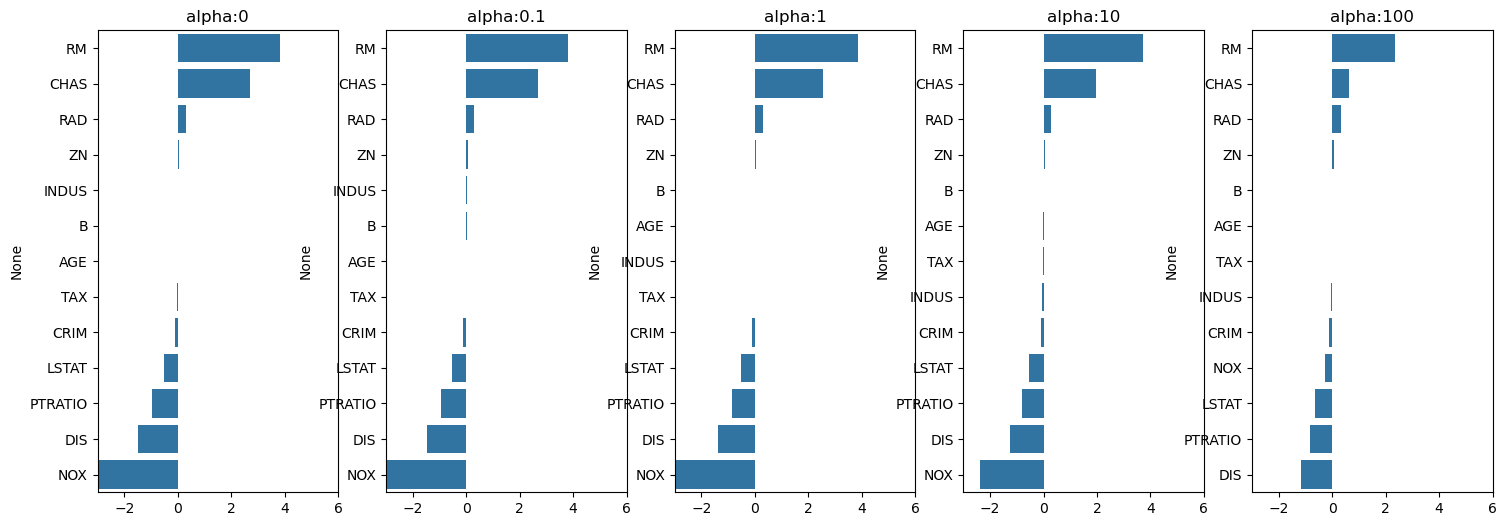

In [26]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



In [27]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [28]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [29]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [30]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [31]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [32]:
# 전처리 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [33]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS